<a href="https://colab.research.google.com/github/Okra77/Iris_LearningFromData/blob/main/Iris_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

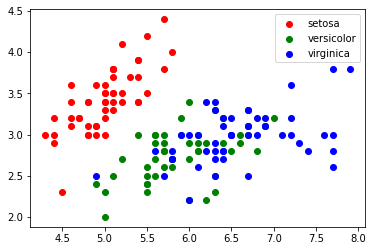

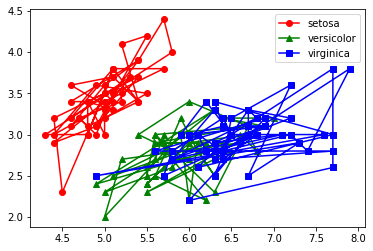

In [17]:
import matplotlib.pyplot as plt
from sklearn import datasets

#加載Iris數據集
iris = datasets.load_iris()
X = iris.data
y = iris.target

#創建散點圖
fig, ax = plt.subplots()
#折線圖
fig, bx = plt.subplots()

#指定顏色
colors = ['red', 'green', 'blue']
markers = ['o', '^', 's']#標記類型

#繪製散點圖
for i in range(3):
    ax.scatter(X[y==i, 0], X[y==i, 1], color=colors[i], label=iris.target_names[i])
    bx.plot(X[y==i, 0], X[y==i, 1], color=colors[i], marker=markers[i], label=iris.target_names[i])
#添加圖例
ax.legend()
bx.legend()

#顯示圖像
plt.show()

epoch: 1, loss: 1.2783
epoch: 2, loss: 1.2632
epoch: 3, loss: 1.2505
epoch: 4, loss: 1.2396
epoch: 5, loss: 1.2301
epoch: 6, loss: 1.2217
epoch: 7, loss: 1.2141
epoch: 8, loss: 1.2073
epoch: 9, loss: 1.2010
epoch: 10, loss: 1.1951
epoch: 11, loss: 1.1897
epoch: 12, loss: 1.1844
epoch: 13, loss: 1.1792
epoch: 14, loss: 1.1738
epoch: 15, loss: 1.1682
epoch: 16, loss: 1.1626
epoch: 17, loss: 1.1569
epoch: 18, loss: 1.1513
epoch: 19, loss: 1.1459
epoch: 20, loss: 1.1403
epoch: 21, loss: 1.1349
epoch: 22, loss: 1.1296
epoch: 23, loss: 1.1244
epoch: 24, loss: 1.1194
epoch: 25, loss: 1.1145
epoch: 26, loss: 1.1099
epoch: 27, loss: 1.1054
epoch: 28, loss: 1.1009
epoch: 29, loss: 1.0966
epoch: 30, loss: 1.0926
epoch: 31, loss: 1.0890
epoch: 32, loss: 1.0856
epoch: 33, loss: 1.0823
epoch: 34, loss: 1.0793
epoch: 35, loss: 1.0764
epoch: 36, loss: 1.0735
epoch: 37, loss: 1.0709
epoch: 38, loss: 1.0683
epoch: 39, loss: 1.0659
epoch: 40, loss: 1.0636
epoch: 41, loss: 1.0613
epoch: 42, loss: 1.0591
e

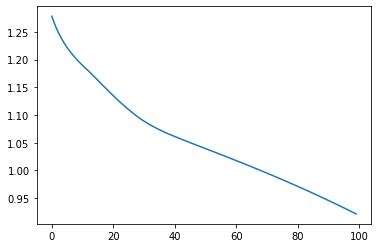

In [18]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn import datasets

#加載Iris數據集
iris = datasets.load_iris()
X = iris.data
y = iris.target

#將數據轉為tensor
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.int64)

#創建Net
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(4, 8)
        self.fc2 = nn.Linear(8, 3)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = Net()

#定義損失函數
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

#紀錄訓練損失
losses = []

#訓練模型
for epoch in range(100):
    #前向傳播
    output = net(X)
    loss = criterion(output, y)
    losses.append(loss.item())

    #反向傳播
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print('epoch: %d, loss: %.4f' % (epoch+1, loss.item()))
torch.save(net, 'model.pth')

#計算樣本概率
def predict(model, x):
    x = torch.Tensor(x)
    output = model(x)
    prob = nn.functional.softmax(output, dim=1)
    return prob.detach().numpy()

#繪製損失曲線
plt.plot(losses)
plt.show()

In [13]:
import torch

#加載訓練好的模型
net = torch.load('model.pth')

#輸入樣本
x = torch.tensor([[5.1, 3.5, 1.4, 0.2]], dtype=torch.float32)

#預測
output = net(x)
pred = output.argmax()

#輸出結果
probs = predict(net, x)
print(probs)
print('預測結果:', pred)

[[0.41247845 0.3376024  0.24991912]]
预测结果: tensor(0)


In [16]:
import torch

#加載訓練好的模型
net = torch.load('model.pth')

#輸入樣本
x = torch.tensor([[5.1, 3.5, 1.4, 0.2],
          [4.9, 3.0, 1.4, 0.2],
          [6.9, 3.1, 5.1, 2.3]], dtype=torch.float32)

#預測
output = net(x)
pred = output.argmax(dim=1)

#輸出結果
probs = predict(net, x)
print(probs)
print('預測結果:', pred)

[[0.41247845 0.3376024  0.24991912]
 [0.40527532 0.33349365 0.26123103]
 [0.10778719 0.36304685 0.5291659 ]]
预测结果: tensor([0, 0, 2])
